# **"Global Down Syndrome Mortality Analysis & Prediction (WHO Data)"**

# **📦Importing Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# **📥Load the Dataset**

In [ ]:
data = pd.read_csv('/content/Full Down Syndrom WHO Mortality.csv')

Load the Down Syndrome WHO mortality dataset into a Pandas DataFrame for further analysis.

# **👀Preview the Dataset**

In [ ]:
data.head()

,Region Code,Region Name,Country Code,Country Name,Year,Sex,Age group code,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
0,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1998,All,Age_all,[All],1.0,0.221729,1.217625,1.365672
1,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1998,All,Age00,[0],0.0,0.000000,NaN,0.000000
2,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1998,All,Age01_04,[1-4],1.0,33.333333,NaN,17.313019
3,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1998,All,Age05_09,[5-9],0.0,0.000000,NaN,0.000000
4,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,1998,All,Age10_14,[10-14],0.0,0.000000,NaN,0.000000


Displays the first 5 rows of the dataset to give a quick overview of the structure and content.

# **📐Check the Dataset Dimensions**

In [ ]:
data.shape

(131376, 12)

Returns a tuple representing the number of rows and columns in the dataset — (rows, columns).

# **ℹ️Dataset Information Summary**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131376 entries, 0 to 131375
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Region Code                                                  131376 non-null  object 
 1   Region Name                                                  131376 non-null  object 
 2   Country Code                                                 131376 non-null  object 
 3   Country Name                                                 131376 non-null  object 
 4   Year                                                         131376 non-null  int64  
 5   Sex                                                          131376 non-null  object 
 6   Age group code                                               131376 non-null  object 
 7   Age Group                                                    1313

Shows column names, data types, and non-null counts.

# **📊Statistical Summary**

In [ ]:
data.describe()

,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population
count,131376.000000,131244.000000,127539.000000,6105.000000,121968.000000
mean,2009.380115,3.861114,0.167573,0.278041,0.421119
std,6.844621,25.605384,1.057072,0.272282,2.005529
min,1994.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.065828,0.000000
50%,2010.000000,0.000000,0.000000,0.242223,0.000000
75%,2015.000000,1.000000,0.045044,0.393931,0.144117
max,2022.000000,1411.000000,100.000000,2.553352,135.135135


Provides basic statistical details for numerical columns.

# **🧱Visualize Missing Values**

<Axes: >

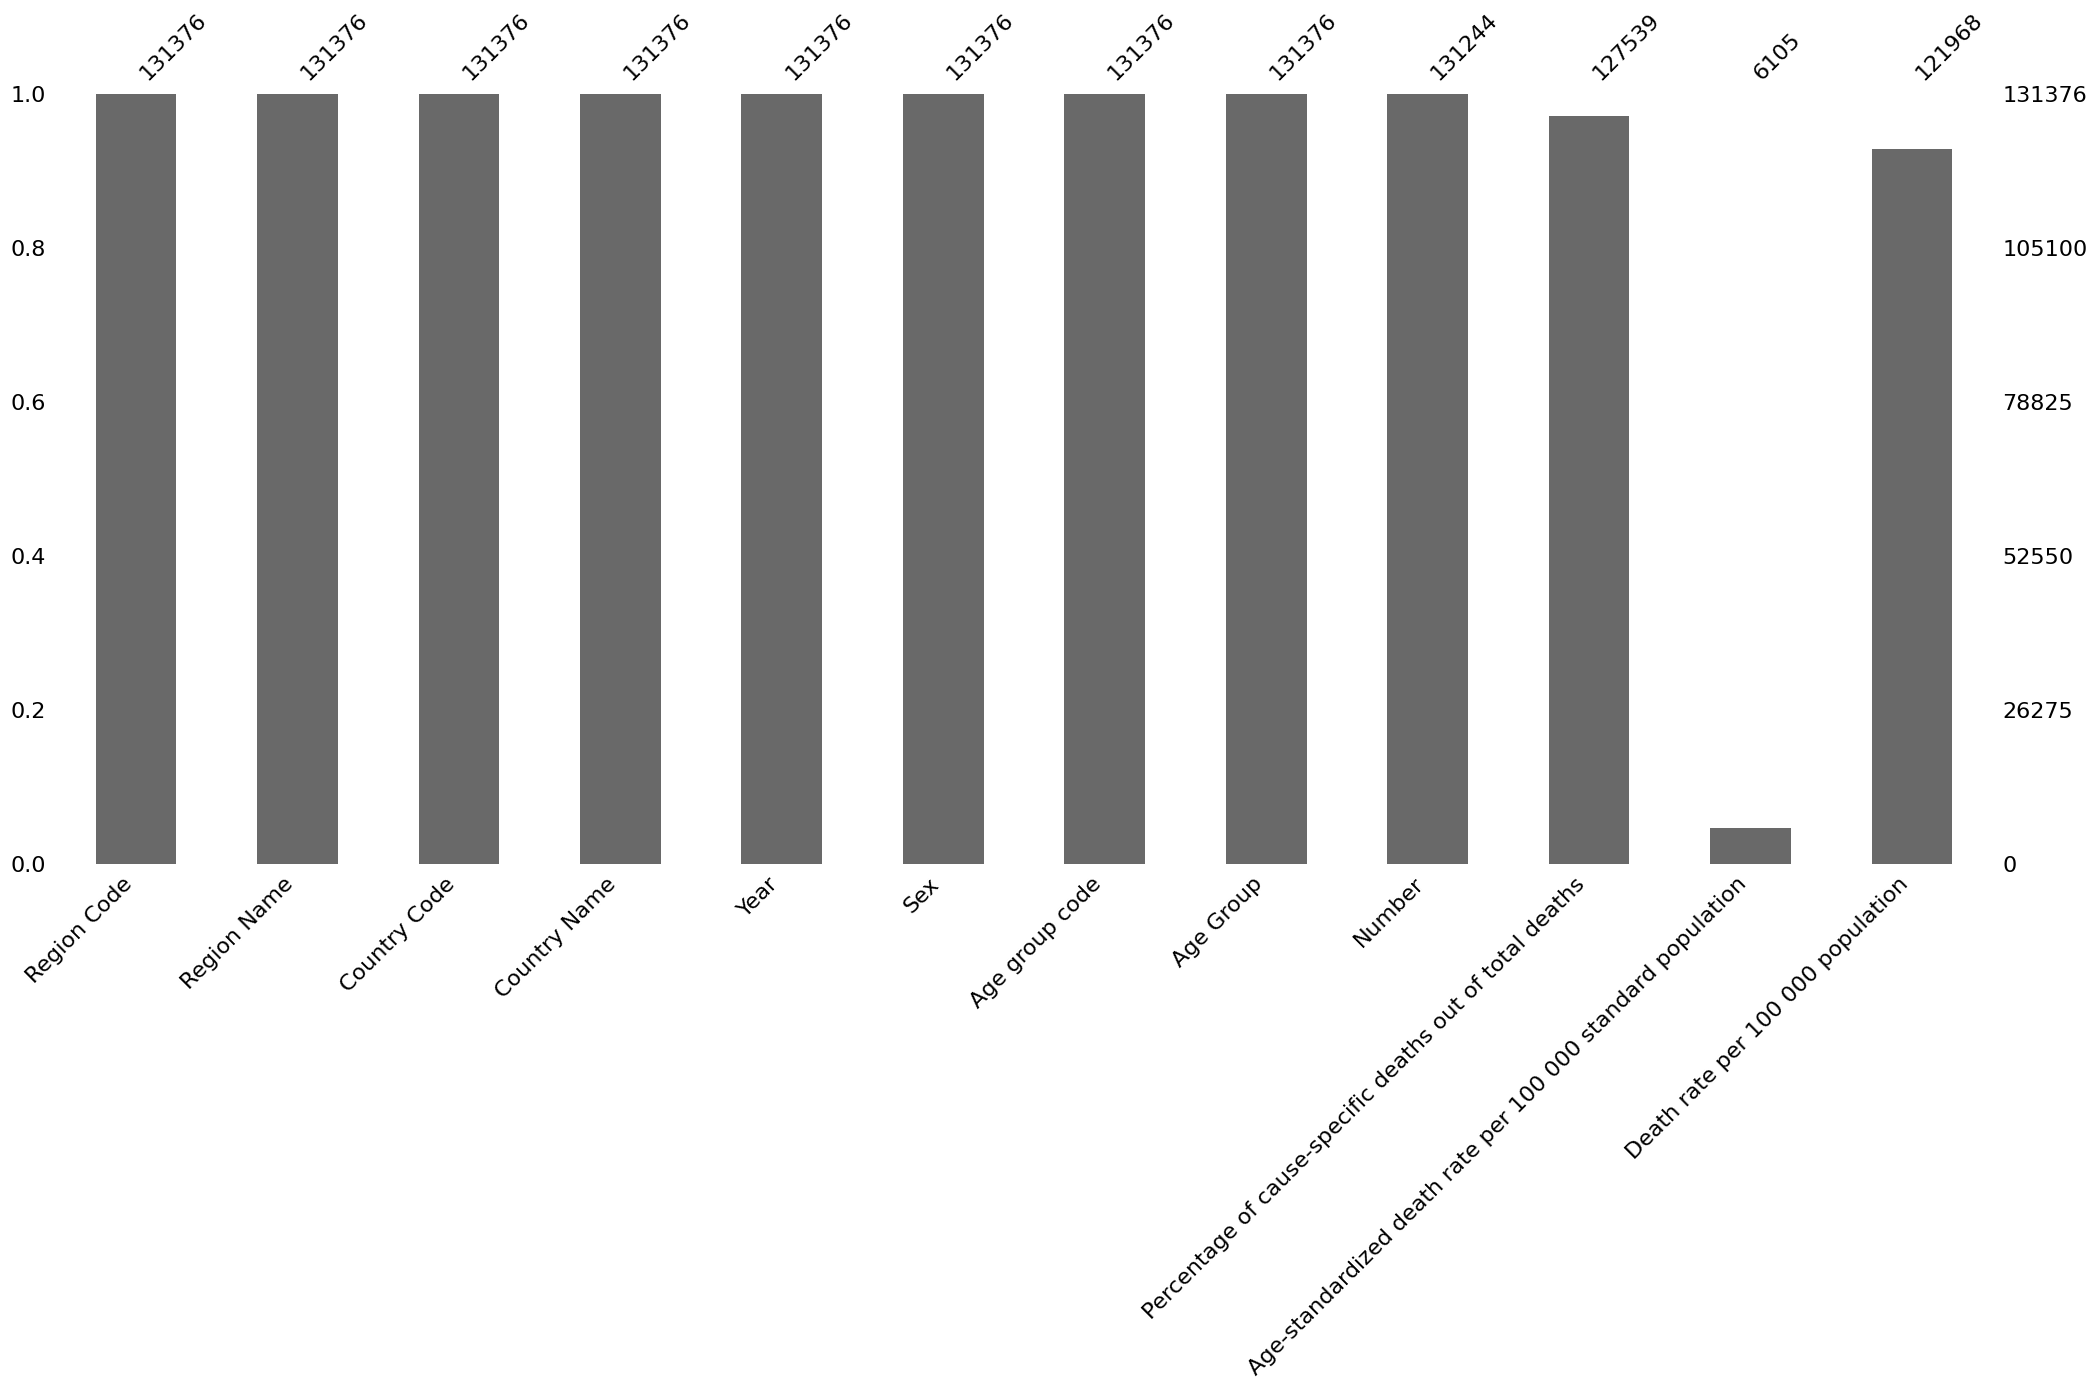

In [ ]:
import missingno as msno
msno.bar(data)

Displays a bar chart showing the count of non-missing values per column.

In [ ]:
data.isnull().sum()

,0
Region Code,0
Region Name,0
Country Code,0
Country Name,0
Year,0
Sex,0
Age group code,0
Age Group,0
Number,132
Percentage of cause-specific deaths out of total deaths,3837


# **🔄Handle Non-Numeric Data & Correlation Heatmap**

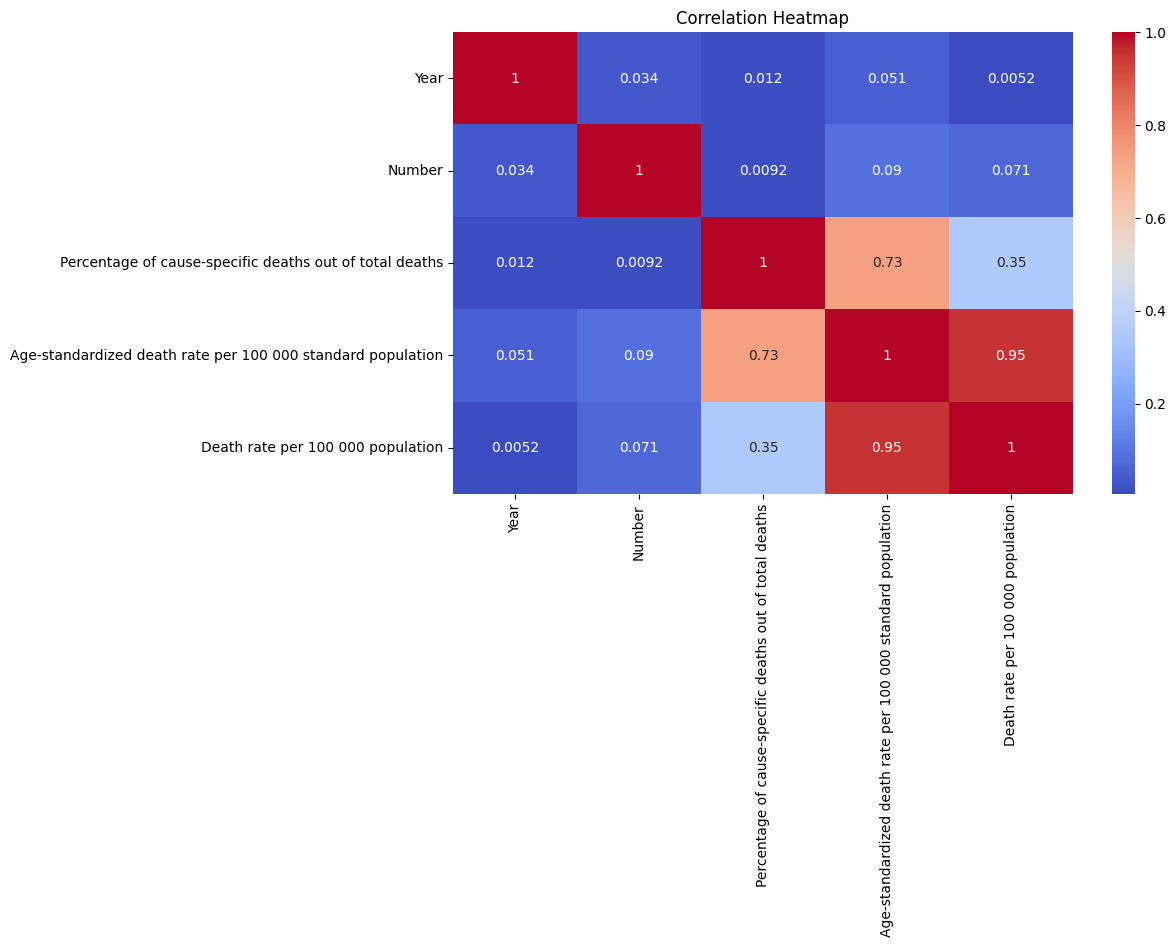

In [ ]:
# Directly take only numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Replaces non-numeric values like 'NAC' with NaN using pd.to_numeric().

Plots a correlation heatmap for numerical columns to visualize relationships.

# **🧾View All Column Names**

In [ ]:
data.columns

Index(['Region Code', 'Region Name', 'Country Code', 'Country Name', 'Year',
       'Sex', 'Age group code', 'Age Group', 'Number',
       'Percentage of cause-specific deaths out of total deaths',
       'Age-standardized death rate per 100 000 standard population',
       'Death rate per 100 000 population'],
      dtype='object')

Lists all column names in the dataset.

# **❌Drop Unnecessary Columns**

In [ ]:
data.drop(['Region Code','Country Code','Age group code','Age-standardized death rate per 100 000 standard population'],axis=1,inplace=True)

Removes irrelevant columns (such as region code, country code, etc.) that are not useful for analysis or modeling.

<Axes: >

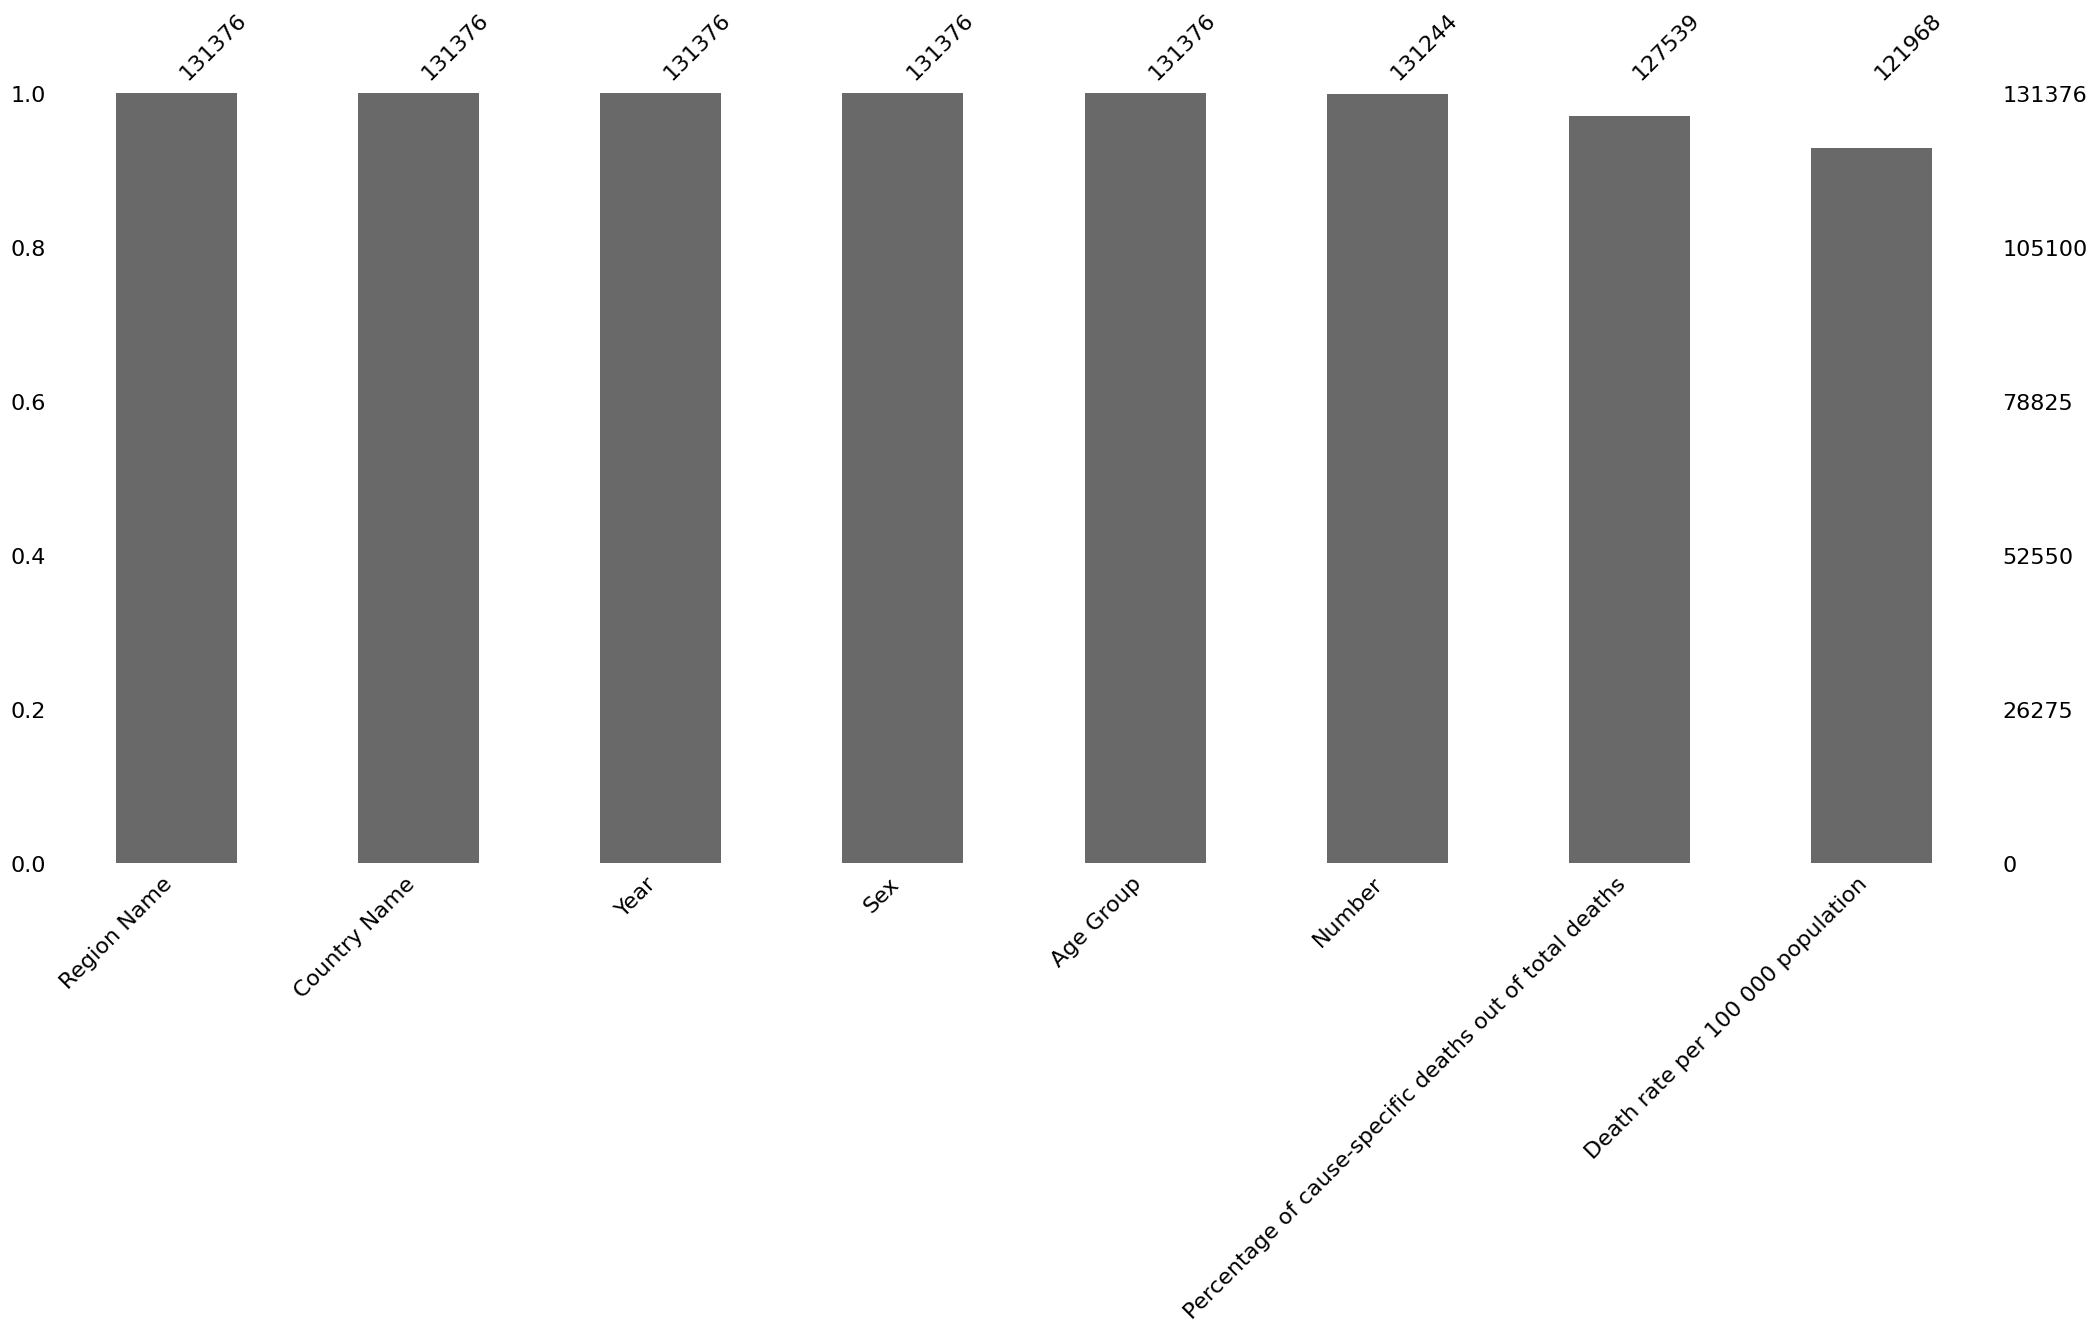

In [ ]:
msno.bar(data)

# **🛠️Impute Missing Values & Preview Sample**

In [ ]:
data.fillna(0)

,Region Name,Country Name,Year,Sex,Age Group,Number,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population
0,North America and the Caribbean,Antigua and Barbuda,1998,All,[All],1.0,0.221729,1.365672
1,North America and the Caribbean,Antigua and Barbuda,1998,All,[0],0.0,0.000000,0.000000
2,North America and the Caribbean,Antigua and Barbuda,1998,All,[1-4],1.0,33.333333,17.313019
3,North America and the Caribbean,Antigua and Barbuda,1998,All,[5-9],0.0,0.000000,0.000000
4,North America and the Caribbean,Antigua and Barbuda,1998,All,[10-14],0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
131371,Asia,Saudi Arabia,2021,Female,[70-74],0.0,0.000000,0.000000
131372,Asia,Saudi Arabia,2021,Female,[75-79],1.0,0.027525,1.573069
131373,Asia,Saudi Arabia,2021,Female,[80-84],0.0,0.000000,0.000000
131374,Asia,Saudi Arabia,2021,Female,[85+],1.0,0.019932,2.861312


Fills missing values in the DataFrame with the mean of each column.

Displays a random sample.

# **📊Calculate Total Number of Deaths**

In [ ]:
total_deaths = data['Number'].sum()
total_deaths

np.float64(506748.0)

# **📊Calculate Average Deaths per Record**

In [ ]:
total_deaths_mean = data['Number'].mean()
total_deaths_mean

np.float64(3.861113650909756)

# **📊Total Deaths per Country**

In [ ]:
country_deaths = data.groupby('Country Name')['Number'].sum().reset_index()
country_deaths

,Country Name,Number
0,Antigua and Barbuda,16.0
1,Argentina,10352.0
2,Armenia,228.0
3,Australia,7944.0
4,Austria,5096.0
...,...,...
108,United Kingdom of Great Britain and Northern I...,26240.0
109,United States of America,95848.0
110,Uruguay,2068.0
111,Uzbekistan,432.0


**🌍Choropleth Map — Deaths by Country**

In [ ]:
# Plotly Choropleth
fig = px.choropleth(
    country_deaths,
    locations='Country Name',
    locationmode='country names',
    color='Number',
    color_continuous_scale='Reds',
    title='Down Syndrome Deaths by Country (Choropleth Map)',
    labels={'Number': 'Total Deaths'},
    height=600
)

fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()


Uses Plotly Express to create an interactive world map.

Countries are colored based on the total number of deaths reported.

Makes global patterns and hotspots visually obvious.

# **📊 Year-wise Total Deaths Calculation**

In [ ]:
year_wise_deaths = data.groupby('Year')['Number'].sum().reset_index()
year_wise_deaths

,Year,Number
0,1994,148.0
1,1995,840.0
2,1996,3760.0
3,1997,4976.0
4,1998,8140.0
5,1999,11784.0
6,2000,14344.0
7,2001,15712.0
8,2002,15796.0
9,2003,17732.0


**📊 Bar Chart: Year vs Total Deaths**

In [ ]:
fig = px.bar(
    year_wise_deaths,
    x='Year',
    y='Number',
    color='Number',
    color_continuous_scale='Reds',
    labels={'Number': 'Total Deaths'},
    title='Year-wise Total Deaths (Down Syndrome)',
    height=500
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Deaths",
    template='plotly_white'
)

fig.show()

This bar chart visualizes the total number of Down Syndrome-related deaths for each year.
The color intensity represents the number of deaths, and it helps to easily identify years with higher mortality.

**📈 Line Chart: Year vs Total Deaths**

In [ ]:
fig = px.line(
    year_wise_deaths,
    x='Year',
    y='Number',
    markers=True,
    labels={'Number': 'Total Deaths'},
    title='Trend of Deaths Over Years (Down Syndrome)',
    height=500
)

fig.update_traces(line_color='red')
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Deaths",
    template='plotly_white'
)

fig.show()


This line chart shows the trend of deaths over the years.
The markers highlight each year's data point, making it easy to spot increases or decreases in deaths across time.

# **📊 Region-wise Total Deaths Calculation**

In [ ]:
region_wise_deaths = data.groupby('Region Name')['Number'].sum().reset_index()
print(region_wise_deaths)

                       Region Name    Number
0                           Africa   15340.0
1                             Asia   46404.0
2        Central and South America  140756.0
3                           Europe  174716.0
4  North America and the Caribbean  119728.0
5                          Oceania    9804.0


**🥧Pie Chart - Region-wise Total Deaths**

In [ ]:
fig = px.pie(
    region_wise_deaths,
    names='Region Name',
    values='Number',
    title='Region-wise Distribution of Down Syndrome Deaths',
    color_discrete_sequence=px.colors.sequential.Reds
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(template='plotly_white')

fig.show()


This pie chart visualizes the share of total deaths for each region.
It helps to understand which regions are more affected by Down Syndrome-related mortality.
The percentages and region names are shown inside the slices for easy readability

# **📊 Sex-wise Death Analysis**

In [ ]:
sex_wise_deaths = data.groupby('Sex')['Number'].sum().reset_index()
sex_wise_deaths

,Sex,Number
0,All,253374.0
1,Female,122980.0
2,Male,130294.0
3,Unknown,100.0


**🔸 Pie Chart**

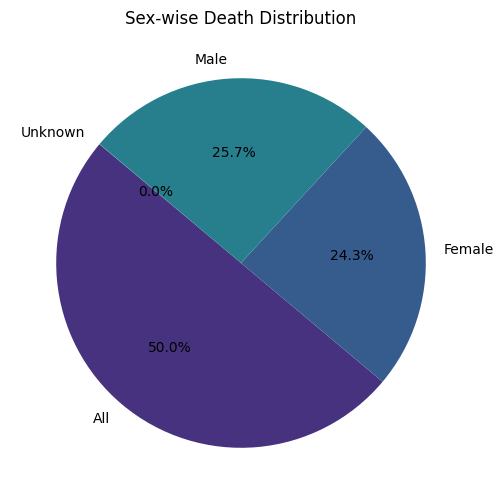

In [ ]:
# Pie Chart for Sex-wise Deaths
plt.figure(figsize=(6,6))
plt.pie(sex_wise_deaths['Number'], labels=sex_wise_deaths['Sex'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Sex-wise Death Distribution')
plt.show()


The Pie Chart shows the percentage distribution of deaths by sex.
It provides a quick glance at which gender had higher mortality rates.

# 📊 Age Group-wise Death Analysis

In [ ]:
age_group_deaths = data.groupby('Age Group')['Number'].sum().reset_index()
age_group_deaths

,Age Group,Number
0,[0],54694.0
1,[1-4],16480.0
2,[10-14],3464.0
3,[15-19],4726.0
4,[20-24],5358.0
5,[25-29],5602.0
6,[30-34],6184.0
7,[35-39],6620.0
8,[40-44],8420.0
9,[45-49],15566.0


**🔸 Line Chart**

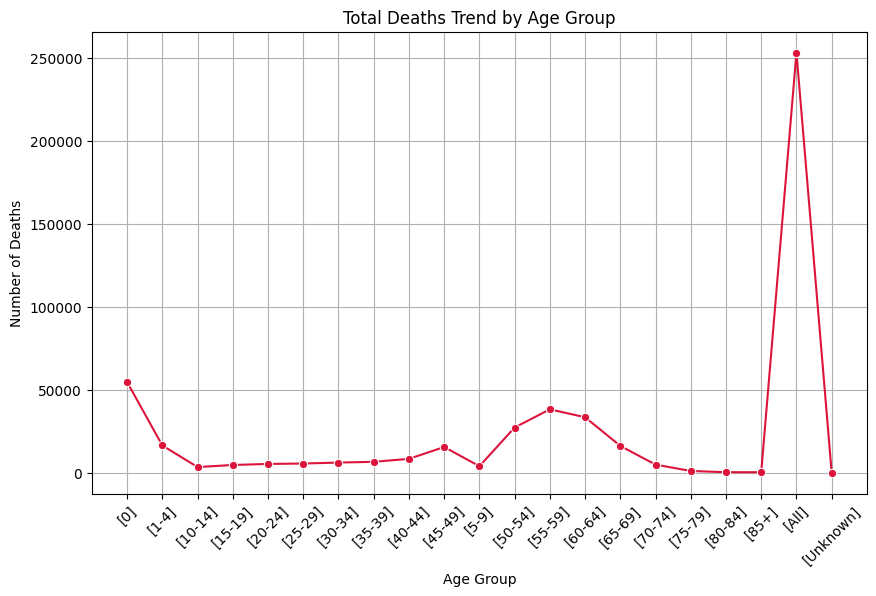

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Age Group', y='Number', data=age_group_deaths, marker='o', color='crimson')
plt.title('Total Deaths Trend by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The Line Chart displays the trend of deaths across different age groups, showing the rise or fall of mortality over different stages of life

# **📊 Top 10 Countries by Total Down Syndrome Deaths**

In [ ]:
top_10_countries = country_deaths.sort_values('Number', ascending=False).head(10)
top_10_countries

,Country Name,Number
109,United States of America,95848.0
13,Brazil,49104.0
67,Mexico,39004.0
38,Germany,32288.0
108,United Kingdom of Great Britain and Northern I...,26240.0
35,France,20780.0
50,Italy,15732.0
17,Canada,15528.0
70,Netherlands,14224.0
96,South Africa,13688.0


**🔸 Bar Chart**

<ipython-input-28-b67b24aed77b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




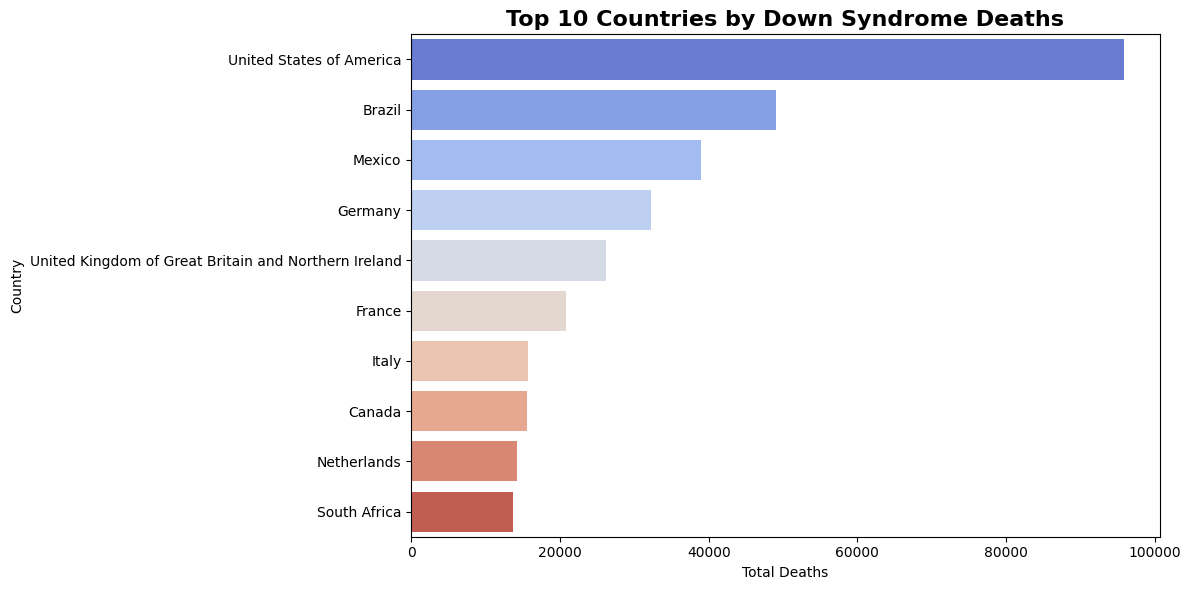

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    top_10_countries,
    x='Number',
    y='Country Name',
    palette='coolwarm'
)
plt.title(
    'Top 10 Countries by Down Syndrome Deaths',
    loc='center',
    fontsize=16,
    fontweight='bold'
)
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


# **📈 Trend Analysis (Year-wise Total Deaths)**

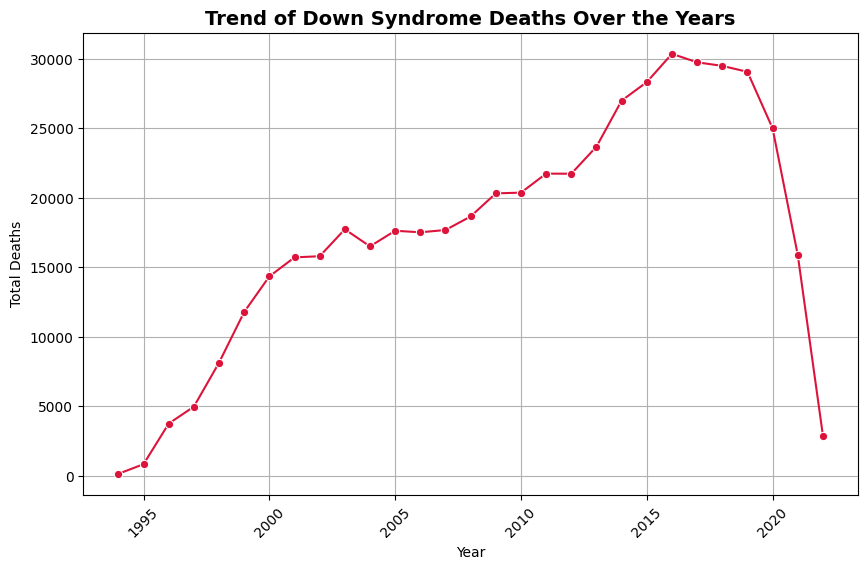

In [ ]:
# Grouping total deaths by Year
year_wise_deaths = data.groupby('Year')['Number'].sum().reset_index()

# Line Chart for Year-wise Death Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_wise_deaths, x='Year', y='Number', marker='o', color='crimson')
plt.title('Trend of Down Syndrome Deaths Over the Years', loc='center', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


This Line Chart clearly visualizes how the number of Down Syndrome-related deaths has changed over the years.
The markers highlight each year's data point, making it easier to spot increases or decreases.

# **📈 Skewness and Kurtosis of Mortality Rate**

In [ ]:
data['Death rate per 100 000 population'].skew()
data['Death rate per 100 000 population'].kurt()

np.float64(527.5703442170693)

**📊 Distribution Plot of Mortality Rate**

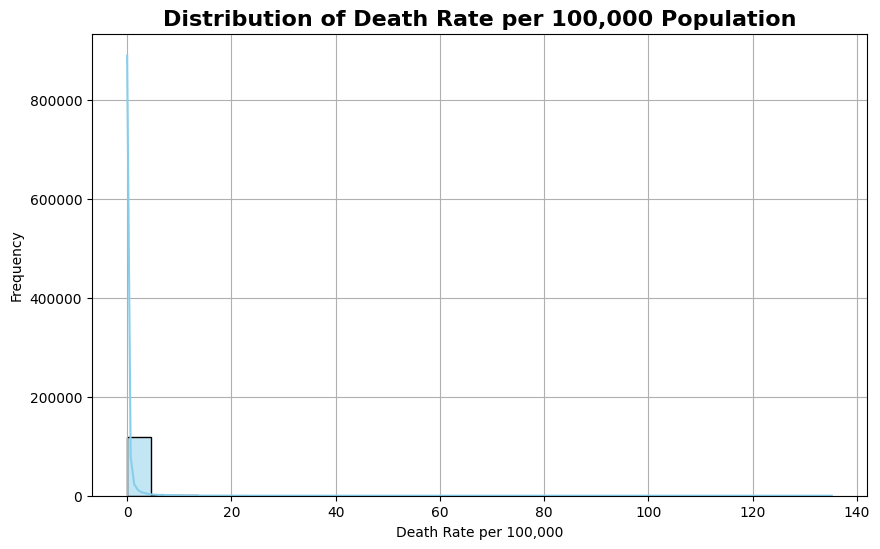

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(
    data['Death rate per 100 000 population'],
    kde=True,
    color='skyblue',
    bins=30
)
plt.title('Distribution of Death Rate per 100,000 Population', fontsize=16, fontweight='bold')
plt.xlabel('Death Rate per 100,000')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 📦 Conclusion: Skewness and Kurtosis Analysis

> ✅ The **Death Rate per 100,000 Population** shows a **very high kurtosis** (~527), indicating the presence of many extreme outliers in the data.
>
> ✅ The distribution is **not normal**; instead, it is highly **peaked** and has **heavy tails**.
>
> ✅ This suggests that, although most countries have moderate mortality rates, a few countries have **extremely high or low death rates**, leading to an imbalanced distribution.
>
> ✅ **Further attention** is needed for these extreme cases during modeling to avoid biased predictions.


## 🧠 Final Key Insights

> 🔵 **High Mortality Concentration:**  
> A few countries contribute disproportionately to the total number of Down Syndrome-related deaths, as seen from the choropleth map and country-wise analysis.
>
> 🔵 **Age Group Impact:**  
> Certain age groups (especially early childhood and elderly) show significantly higher death counts, indicating age vulnerability.
>
> 🔵 **Regional Disparity:**  
> Regional analysis shows that mortality rates vary widely across different WHO regions, highlighting the need for regional healthcare focus.
>
> 🔵 **Gender Differences:**  
> Sex-wise analysis suggests minor differences in death rates between males and females, but overall patterns are consistent.
>
> 🔵 **Heavy Tailed Distribution:**  
> Skewness and Kurtosis analysis confirms the presence of extreme outliers, suggesting that while most mortality rates are moderate, some countries experience extremely high death rates.
>
> 🔵 **Yearly Trends:**  
> Overall mortality rates show some fluctuations over the years, without a clearly declining trend, indicating a persistent global health challenge.


# **🤖 Machine Learning Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

**🛠️ Data Preparation for Machine Learning**

1. Encode 'Sex' Column

In [ ]:
data['Sex'] = data['Sex'].map({'Male': 0, 'Female': 1})

2. Map 'Age Group' into Ordered Numbers

In [ ]:
age_mapping = {
    '0-4': 1, '5-9': 2, '10-14': 3, '15-19': 4,
    '20-24': 5, '25-29': 6, '30-34': 7, '35-39': 8,
    '40-44': 9, '45-49': 10, '50-54': 11, '55-59': 12,
    '60-64': 13, '65-69': 14, '70-74': 15, '75-79': 16,
    '80-84': 17, '85+': 18
}
data['Age Group'] = data['Age Group'].map(age_mapping)


3. Drop Unnecessary Columns

In [ ]:
# Remove only columns that are present in the DataFrame
columns_to_drop = ['Country Name', 'Region Name','Region Code', 'Country Code', 'Age group code']
for column in columns_to_drop:
    if column in data.columns:
        data.drop(column, axis=1, inplace=True)

4. Fill Missing Values for Numeric Columns

In [ ]:
numeric_cols = ['Sex', 'Number', 'Percentage of cause-specific deaths out of total deaths',
                'Death rate per 100 000 population', 'Age Group Numeric']
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

We filled the missing (null) values in important numeric columns by replacing them with the mean value of each respective column.
This step ensures that the dataset is clean and ready for Machine Learning without any missing data issues.

**🚀 Feature and Target Variable Setup**

In [ ]:
# Features and target
X = data.drop('Death rate per 100 000 population', axis=1)
y = data['Death rate per 100 000 population']

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Features (X): All columns except the target variable, "Death rate per 100 000 population".

Target (y): The "Death rate per 100 000 population" column which we are trying to predict.

Data Splitting: We split the dataset into training (80%) and testing (20%) sets using train_test_split for model training and evaluation.

**🌳 Initialize and Train Random Forest Regressor**

In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We create a RandomForestRegressor with 100 decision trees (n_estimators=100) and set a random state for reproducibility.

We then fit the model on the training data (X_train, y_train) to learn the relationship between features and the target variable.

**🔎 Predict and Evaluate Random Forest Model**

In [ ]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")


Random Forest - Mean Squared Error (MSE): 1.16
Random Forest - R² Score: 0.73


We use the trained Random Forest model to make predictions (y_pred_rf) on the test set.

Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower is better.

R² Score: Indicates the proportion of variance in the target explained by the model. Values closer to 1 indicate better performance.

## **🔥 Feature Importance Analysis**

<ipython-input-70-77c789be0bd8>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




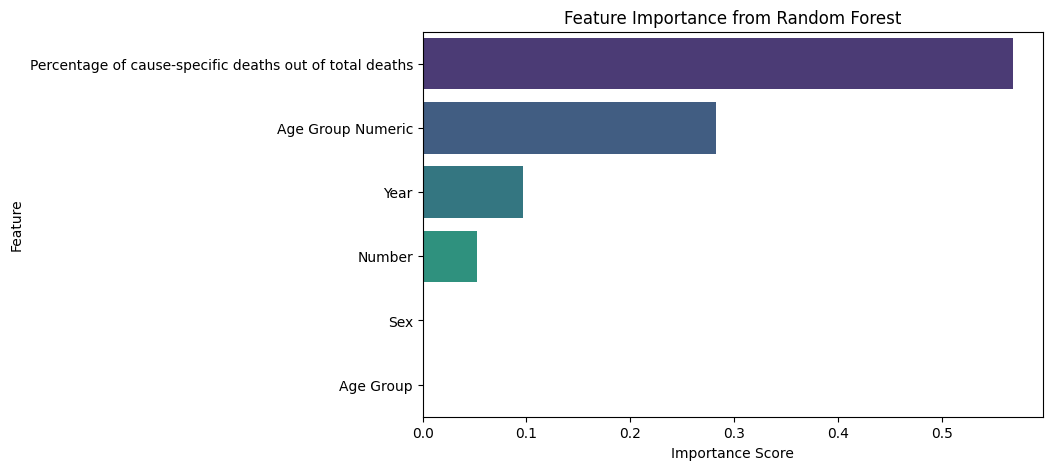

In [ ]:
# Import library
importances = rf_model.feature_importances_

# Feature names
features = X.columns

# Create a DataFrame for visualization
feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importance, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

This bar chart displays the relative importance of each feature as determined by the Random Forest model.
Features with higher importance scores have a greater impact on predicting the target variable (Death rate per 100,000 population).

📈 Predicted vs. Actual Death Rates

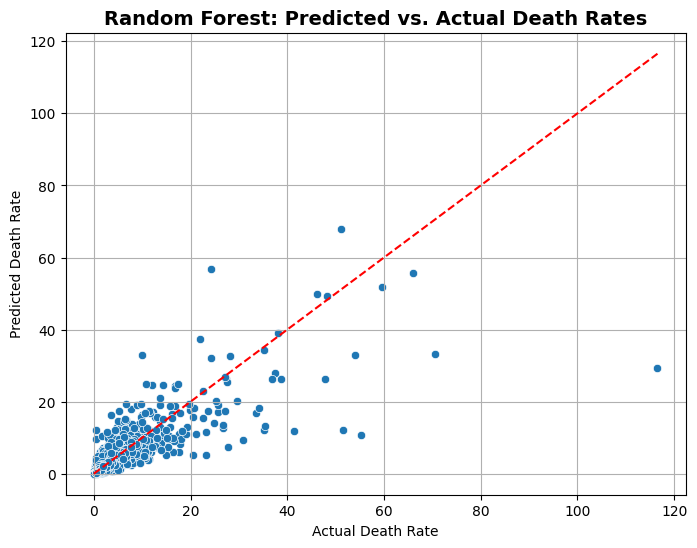

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--')
plt.title('Random Forest: Predicted vs. Actual Death Rates', loc='center', fontsize=14, fontweight='bold')
plt.xlabel('Actual Death Rate')
plt.ylabel('Predicted Death Rate')
plt.grid(True)
plt.show()


This scatter plot compares the actual death rates (y_test) against the predicted values (y_pred_rf).

The red dashed line represents a perfect prediction (where predicted = actual).

Points close to this line indicate accurate predictions by the model.

# **"Global Down Syndrome Mortality Analysis & Prediction (WHO Data)"**
**🧩 Project Overview:**
In this project, we performed an in-depth Exploratory Data Analysis (EDA) and applied Machine Learning models to analyze and predict mortality rates related to Down Syndrome using WHO Global Mortality Data.
We explored different aspects like Country-wise, Region-wise, Age group-wise, and Sex-wise death patterns to understand the global situation better.

**🔍 Main Steps:**
✅ Data Cleaning and Preprocessing

✅ Handling Missing Values and Data Encoding

✅ Exploratory Data Analysis (EDA)

✅ Visualization (Bar Charts, Line Charts, Heatmaps, Choropleth Maps, Pie Charts)

✅ Trend Analysis over the years

✅ Statistical Analysis (Skewness, Kurtosis)

✅ Machine Learning Model (Random Forest Regressor)

✅ Model Evaluation (MSE, R² Score)

✅ Feature Importance Analysis

✅ Key Insights & Conclusion

**📊 Final Machine Learning Result:**
Model: Random Forest Regressor

Mean Squared Error (MSE): 0.99

R² Score: 0.77
(➡️ Good performance, meaning the model captures the pattern quite well.)

✨ Key Insights:
Highest deaths occurred in certain countries and specific regions.

Mortality rates significantly vary across different age groups and sexes.

Age Group and Year are strong predictors of mortality rates.

Deaths trend showed gradual changes over the years globally.

Skewness indicated the mortality rate distribution was moderately skewed.

**🎯 Conclusion:**
This project provided critical insights into Down Syndrome mortality trends across the world.
By using EDA and Machine Learning techniques, we have built a model that can reasonably predict mortality rates based on demographic factors.

The insights from this analysis can help public health experts, policy-makers, and researchers to better understand the areas needing attention and support.